# Read and plot the result of the comparison between model and observation

In [1]:
from numpy import array, save, log10
import astropy.io.votable.tree as vo
from astropy.table import Table, hstack
from astropy import constants as cst
import numpy as np

In [2]:
from Tools import *

In [3]:
#########
#Criteria
#########
#
radiusminmax=array([0.6,1.5])*cst.R_jup.value
massminmax=array([5,20])*cst.M_jup.value
sig=0.96
NbDegreeFree= 44 #44 5
#
########
'''
'''
# hr8799 e
#--------- definition parametres planete
R=1.*cst.R_jup.value #m 1*Rjup
Distance=10.0*3.086e16  # m, 41.29 pc
FitType=["Full"] #Full, SED, Spec
dir_input=["output/"]
dir_output=["output/"]
planetName=['hr8799e']
datafile=dir_input[0]+planetName[0]+"_SPHERE_"+FitType[0]+".xml"
typeCloud='0003new'#'nocloud'

ER_input="input/grids/cloud/"

colors_planets=[[1., 0., 0.]]#,[1., 1., 0.]]#,[0., 1., 1.],[0., 0., 1.]]

#########
#Criteria
#########
#
radiusminmax=array([0.6,1.5])*cst.R_jup.value
massminmax=array([5,15])*cst.M_jup.value
sig=0.96
NbDegreeFree= 5#44 5
#
########

In [4]:
######################### Combining datasets
param=[]
fit=[]
spec=[]

for p in range(len(FitType)):
    for m in range(len(dir_input)):
        param.append(Table.read(dir_output[m]+"FitFinal"+FitType[p]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="parameters"))
        fit.append(Table.read(dir_output[m]+"FitFinal"+FitType[p]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="fit"))
        spec.append(Table.read(dir_output[m]+"FitFinal"+FitType[p]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="spectre"))

paramJup=[]
for p in range(len(FitType)):
    for m in range(len(dir_input)):
        paramJup.append(hstack([param[p+m]["gravity","Teff","metalicity"],fit[p+m]["radius","mass","chi2final"]]))

######################### -------------------

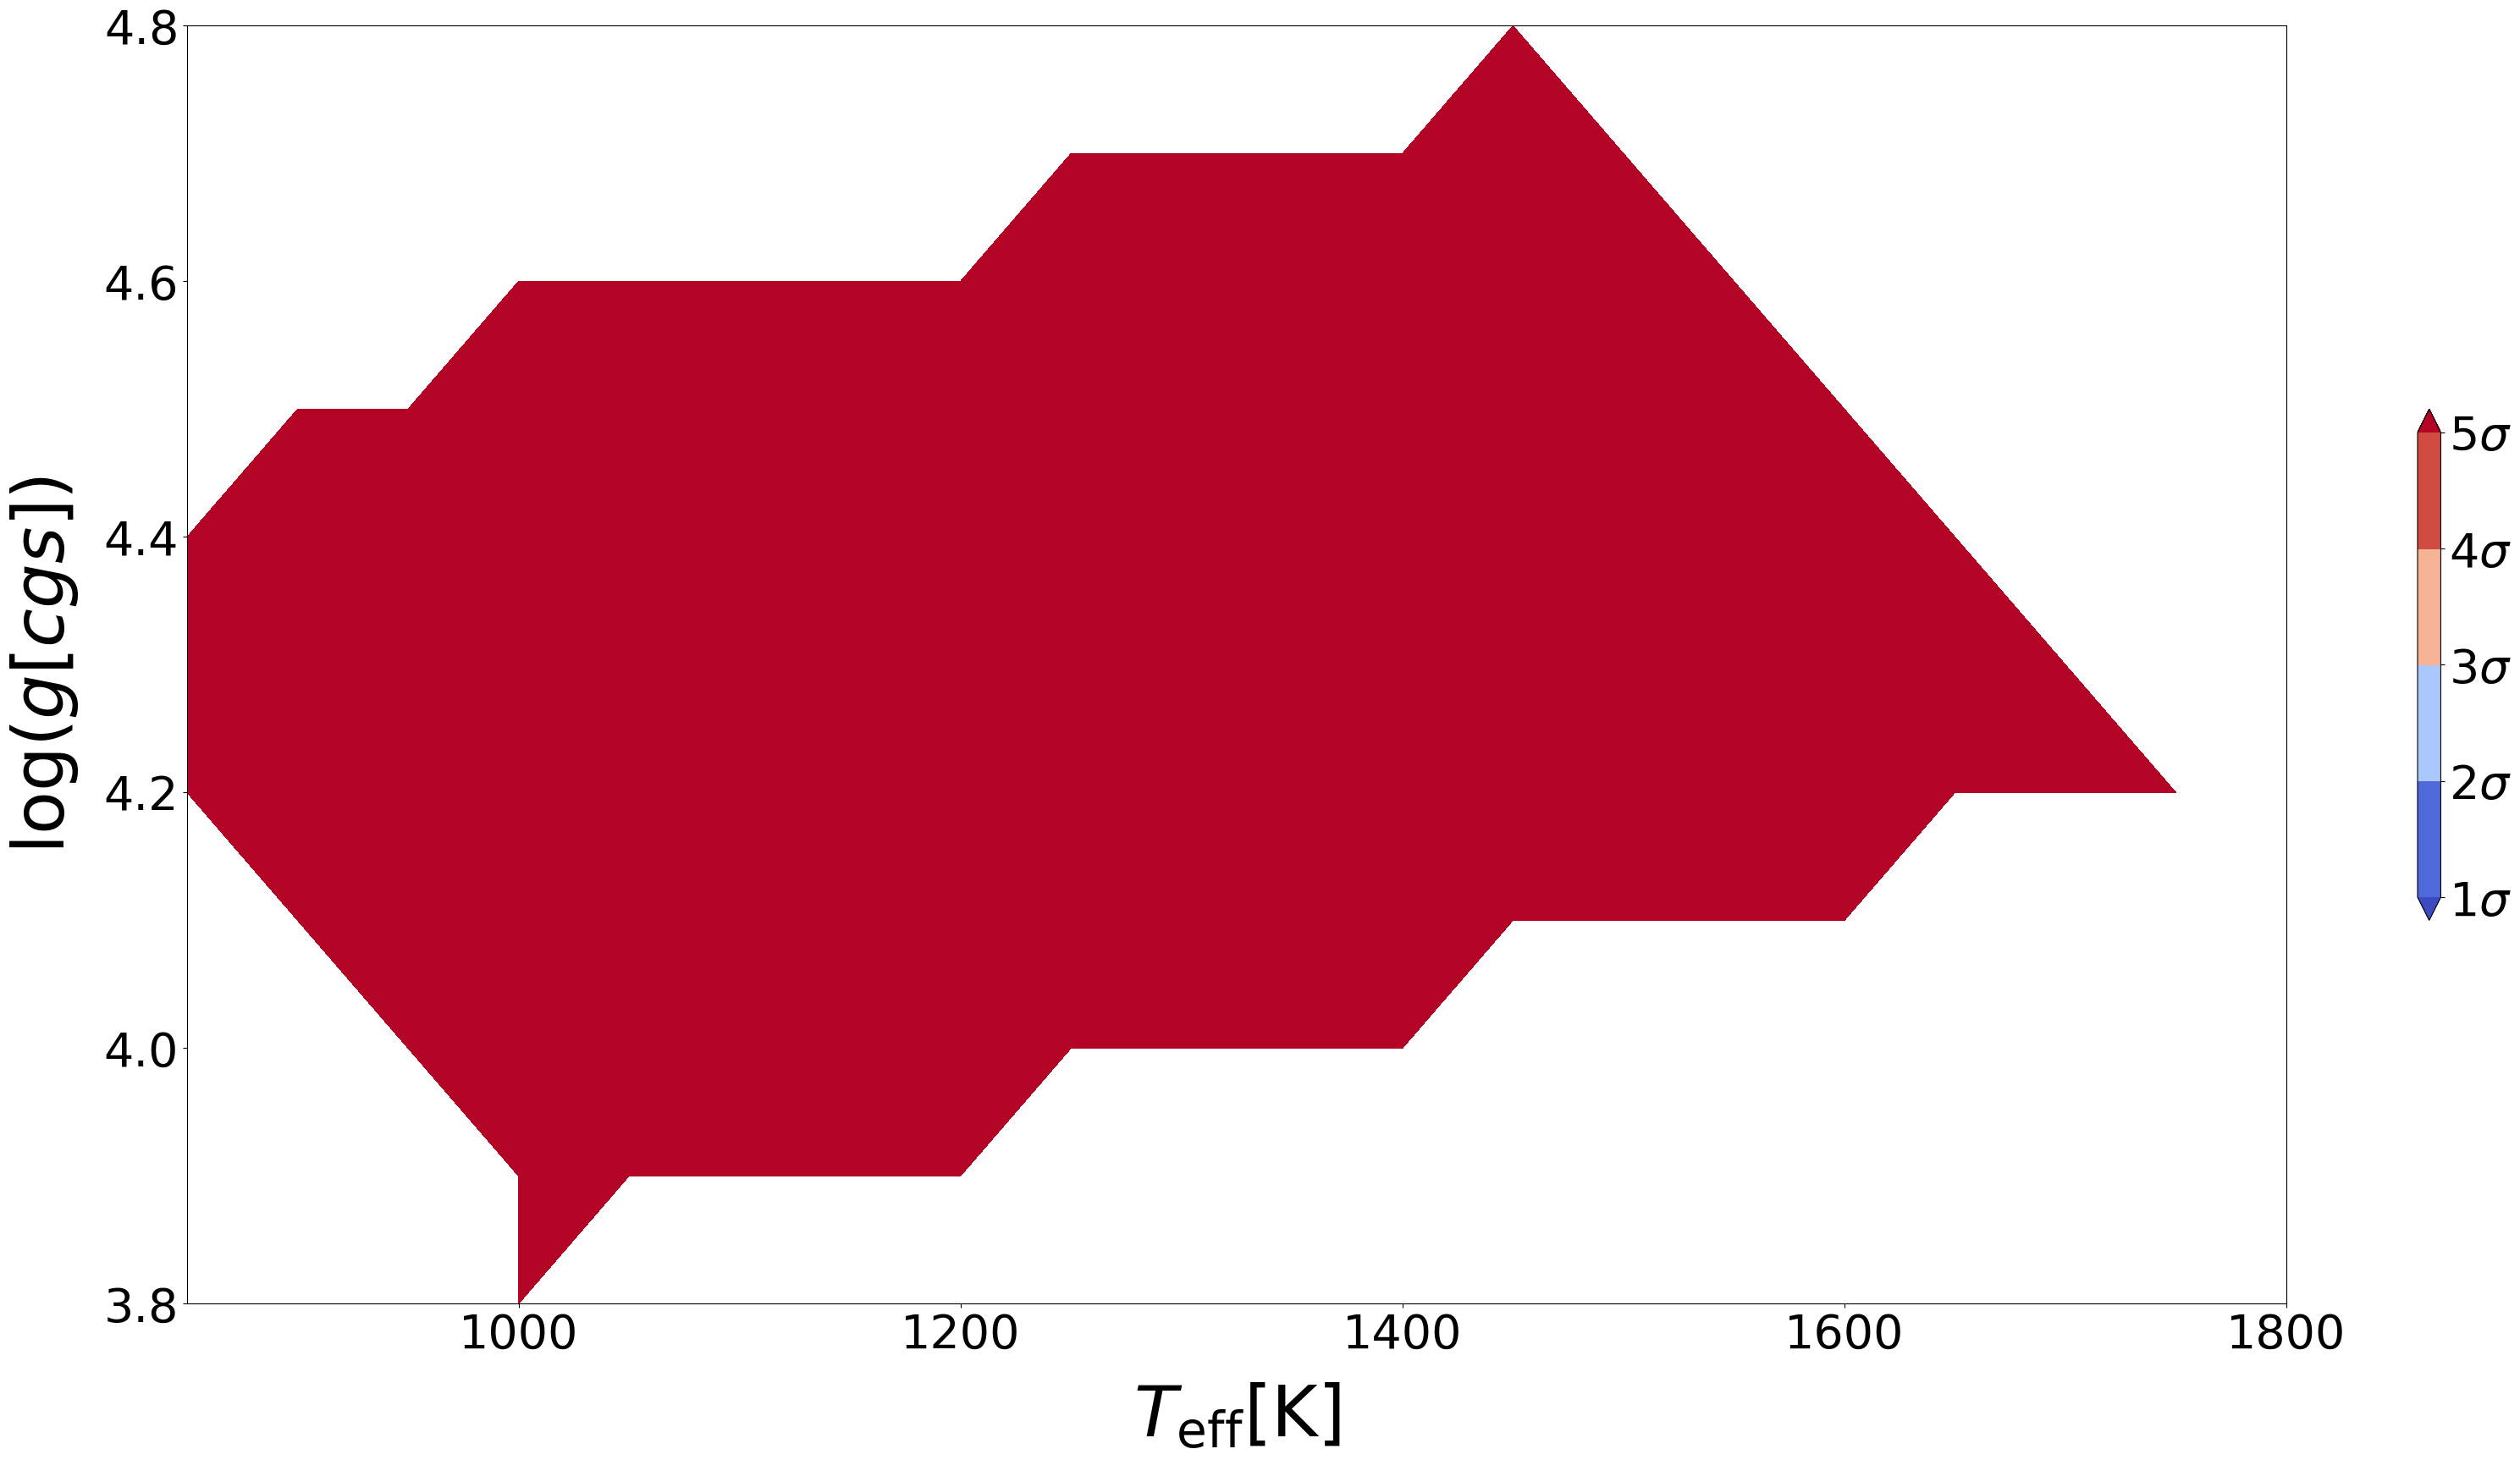

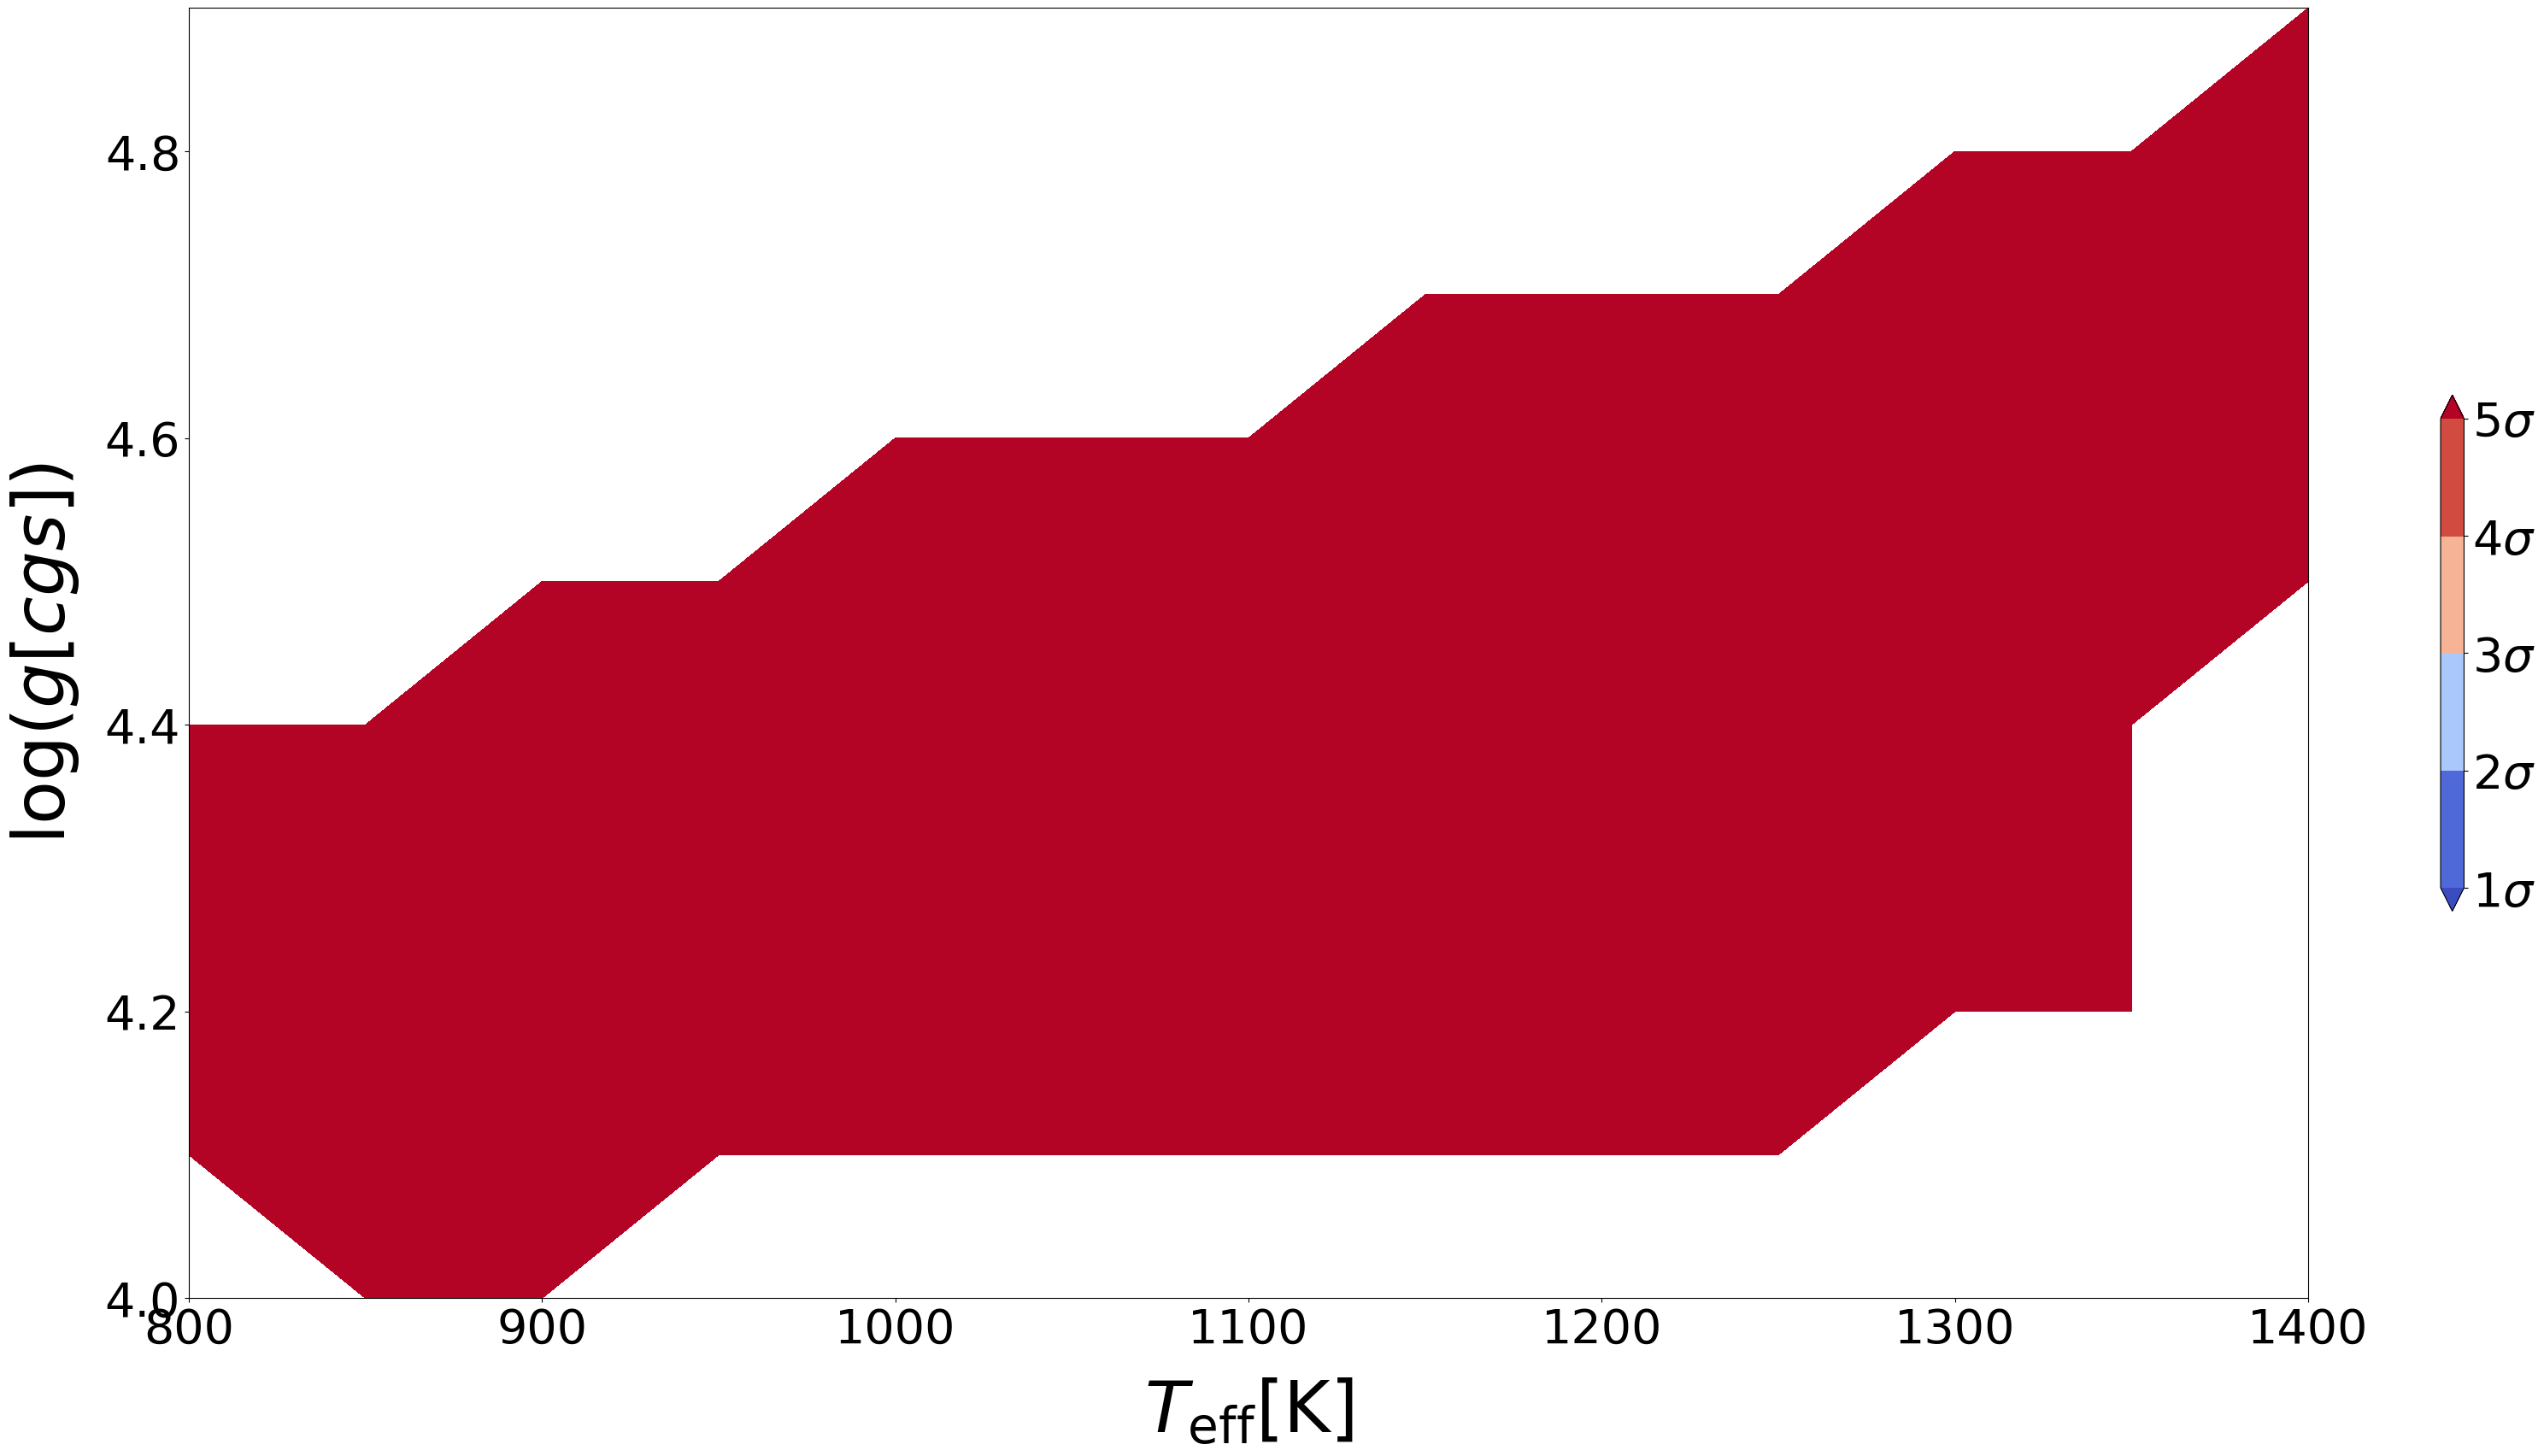

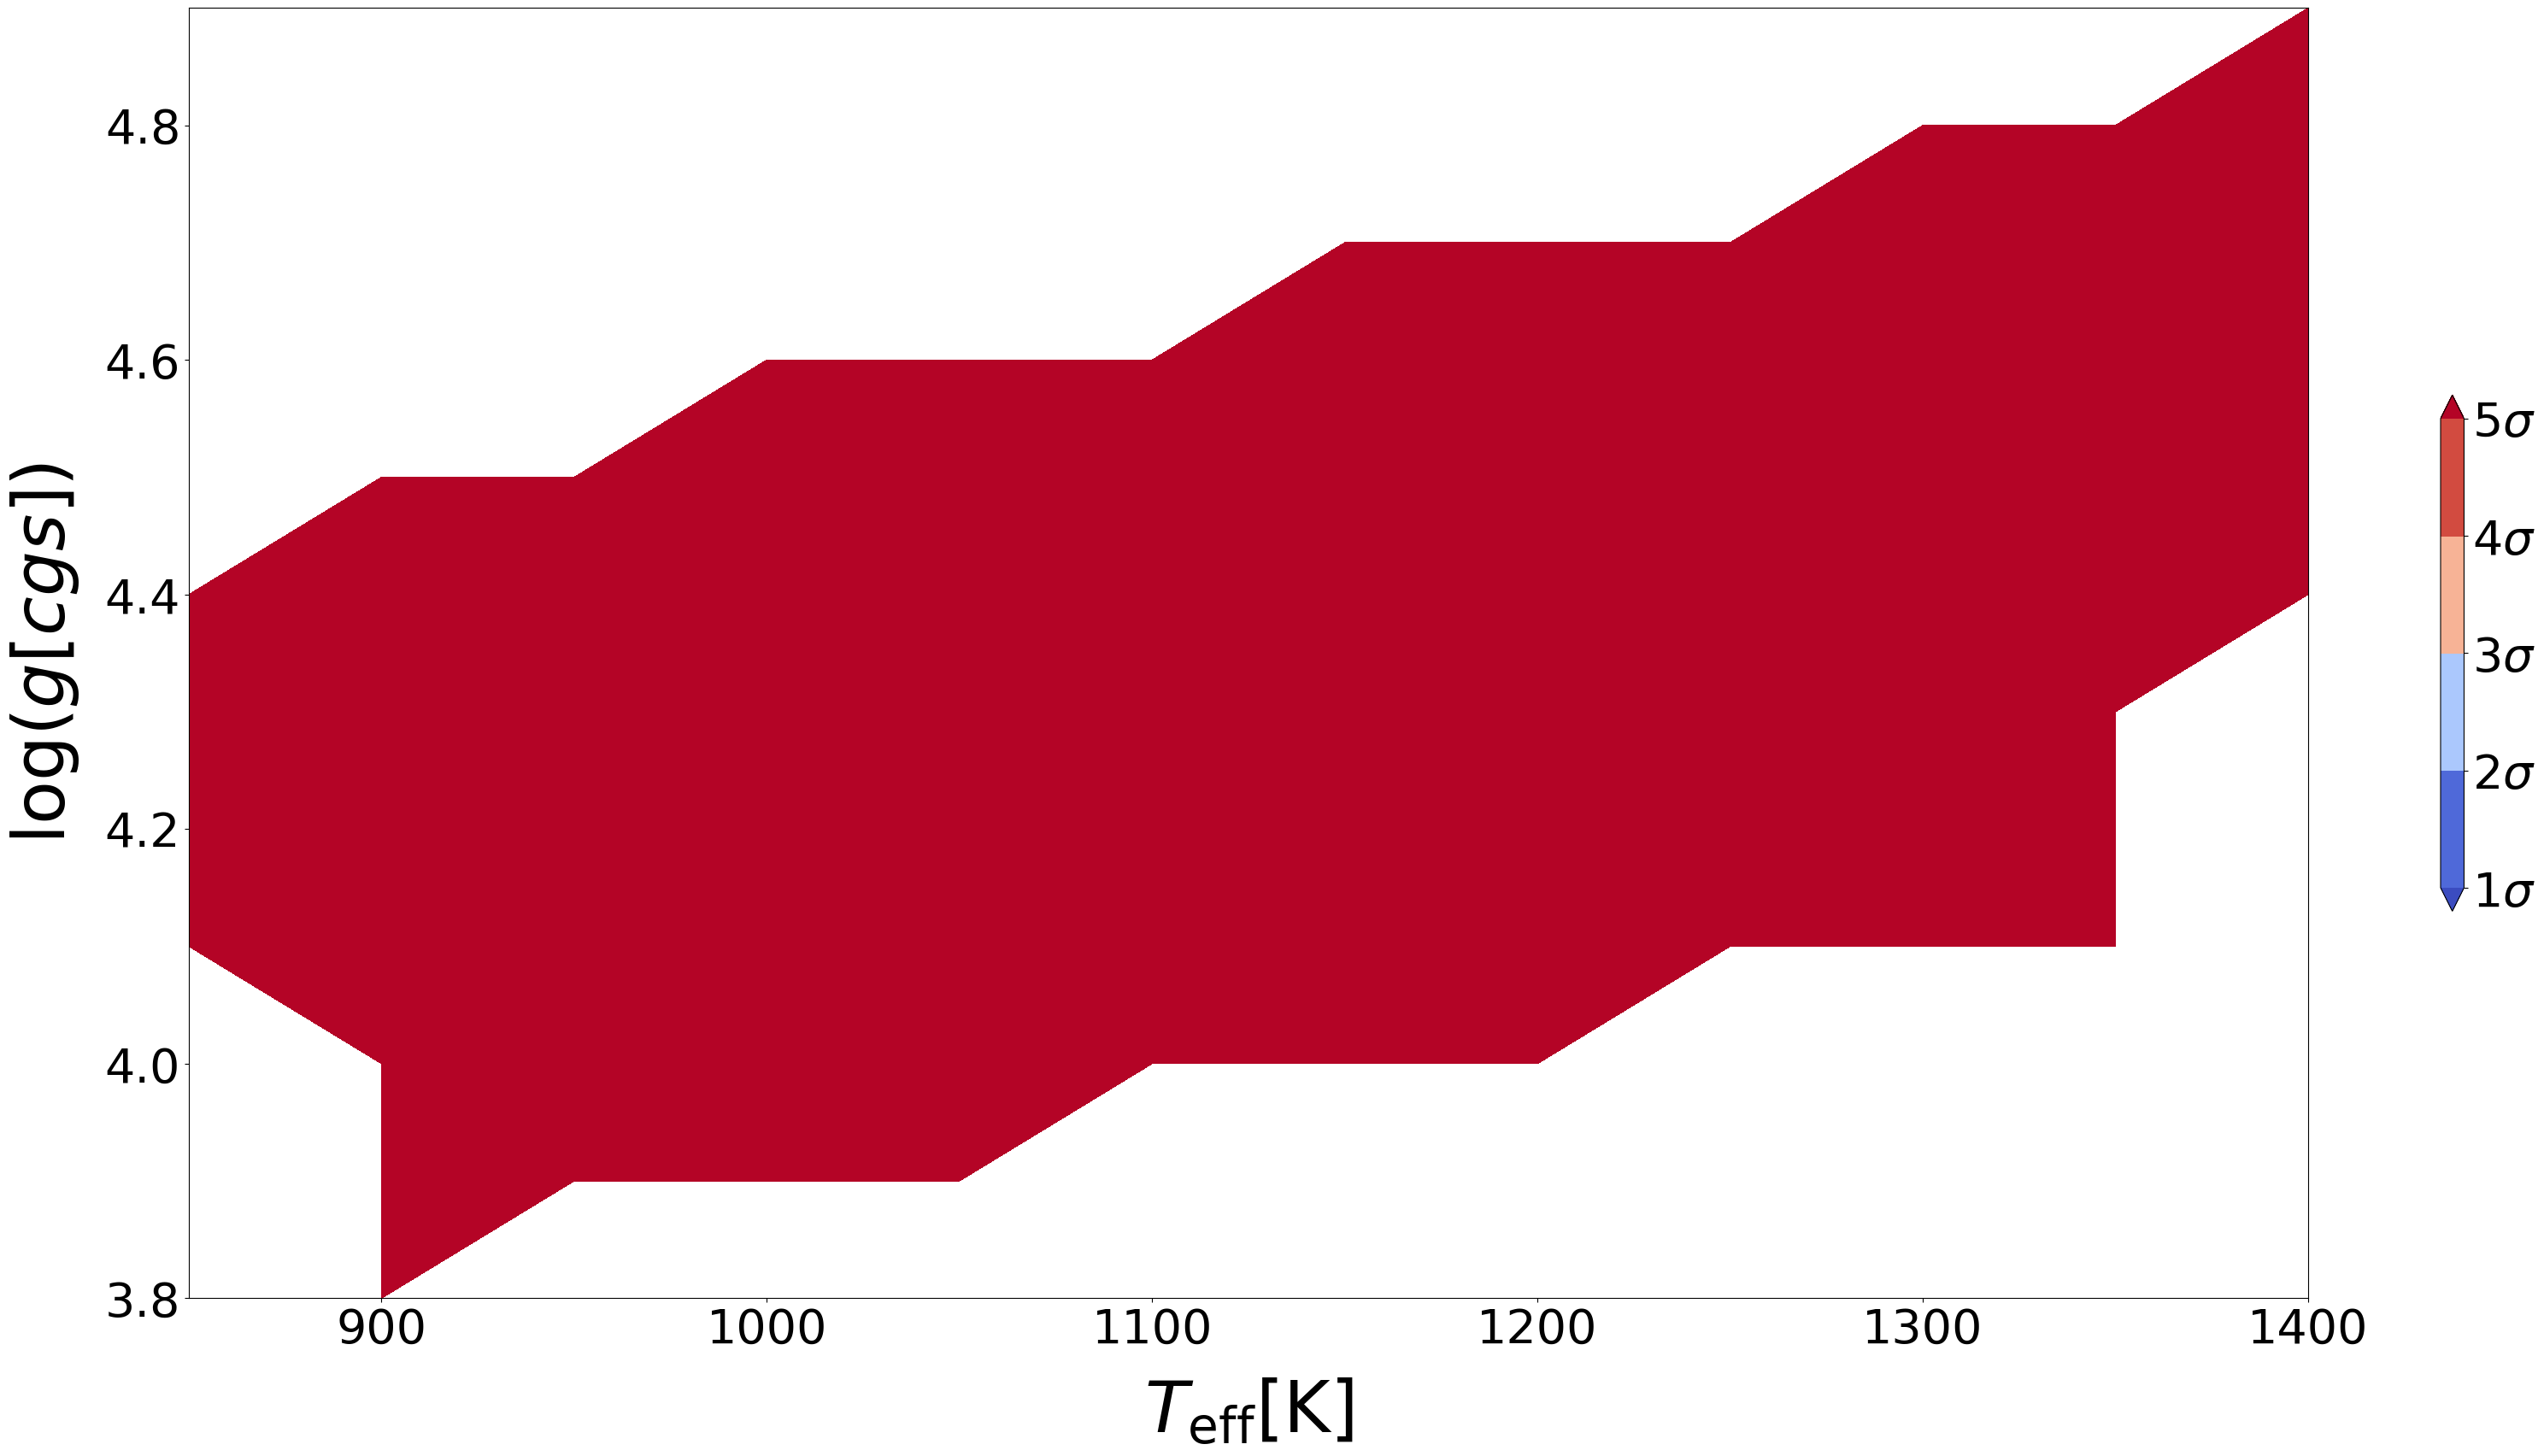

()

In [5]:
plotGrid(Table.read(dir_output[0]+"FitFinal"+FitType[0]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="parameters"),
        Table.read(dir_output[0]+"FitFinal"+FitType[0]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="fit"),
        dir_output,
        radiusminmax, massminmax,
        NbDegreeFree
        )

1247 +- 100.0
4 +- 0.0
3 +- 0.0


gravity,Teff,metalicity,radius,mass,chi2final
cm / s2,K,,m,kg,
float64,float64,float64,float64,float64,float64
12589.252000000004,1200.0,3.1622777,70439267.96541794,9.49191193848849e+27,48.87996566468739
15848.924799999999,1250.0,3.1622777,69858115.22460382,1.1753240924881453e+28,55.61124131086059
19952.632800000014,1200.0,3.1622777,71316449.6904151,1.5420687815738173e+28,35.09976030738972
19952.632800000014,1250.0,3.1622777,67726030.73633437,1.3907067492863091e+28,38.62945857014993
25118.869100000014,1200.0,3.1622777,70653063.33527902,1.9054000893722015e+28,24.893324495189805
25118.869100000014,1250.0,3.1622777,68183166.45535919,1.7745102841784164e+28,38.96698002314358
31622.77729999999,1150.0,3.1622777,70438290.4602646,2.3841947608678773e+28,45.5318907274305
31622.77729999999,1200.0,3.1622777,70466651.8596246,2.3861151002872685e+28,42.33590551209021


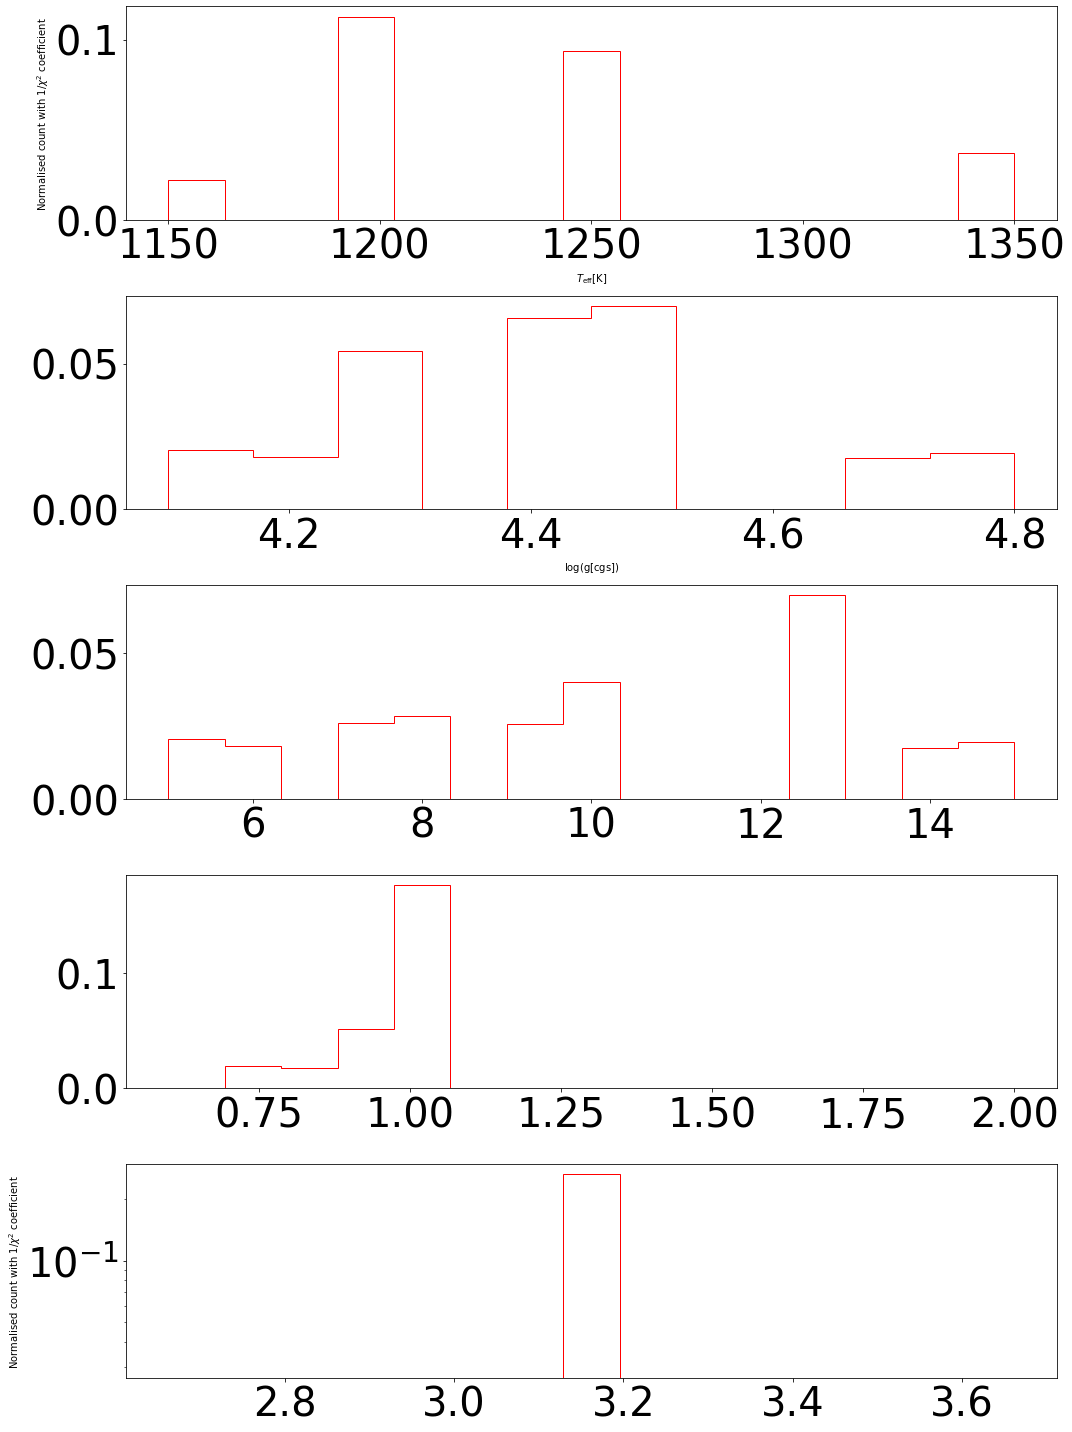

In [6]:
plotHisto(["hr8799e"], ["Cld"], paramJup, param, sig, radiusminmax, massminmax,
        dir_output, planetName,
        ER_input, NbDegreeFree, 
          colors_planets,option=["y","y","y","y","y"])